In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [5]:
data=pd.read_csv("Mall_Customers.csv")

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
data.shape

(200, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


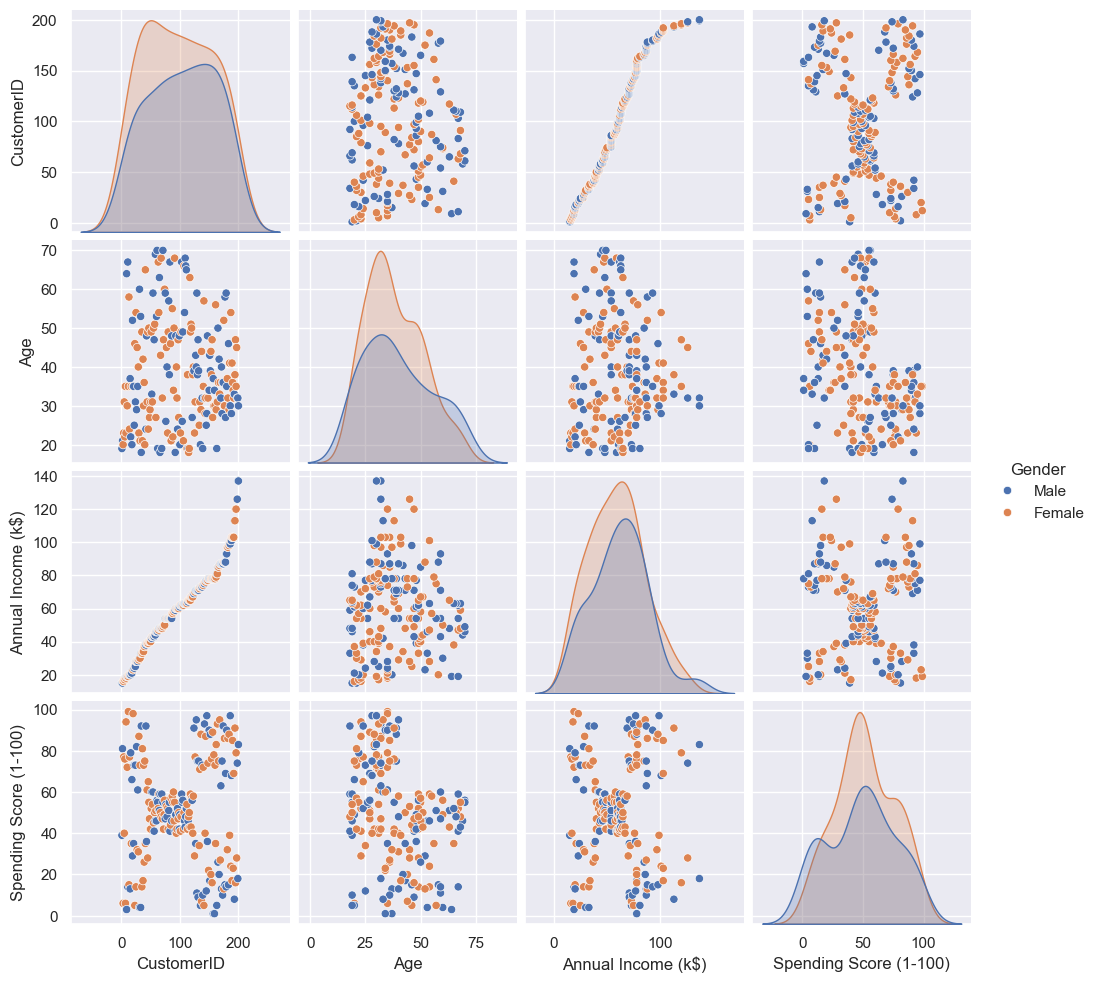

In [24]:

sns.set()
sns.pairplot(data=data,hue="Gender")
plt.show()

In [25]:
data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

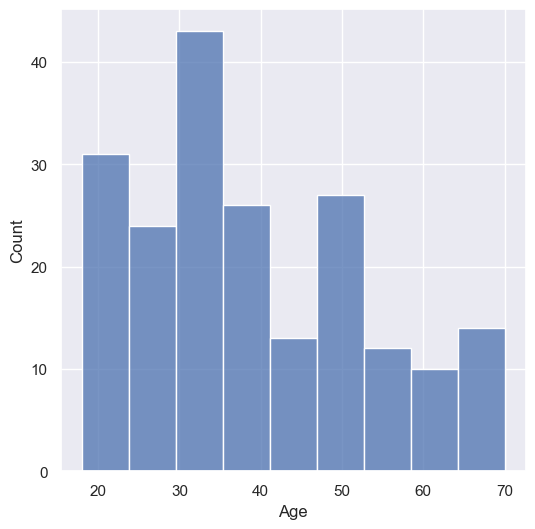

In [27]:
plt.figure(figsize=(6,6))
sns.histplot(data['Age'])
plt.show()

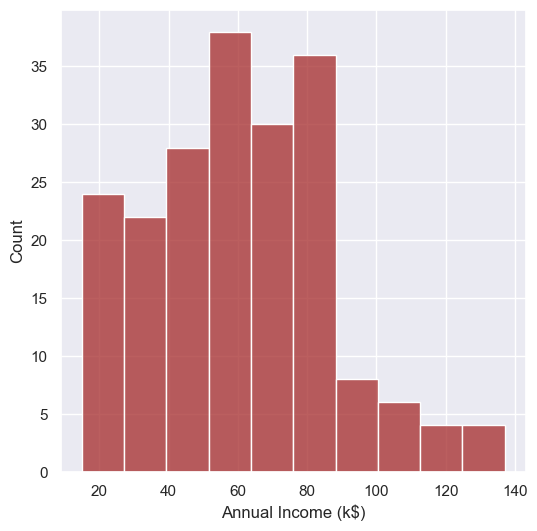

In [28]:
plt.figure(figsize=(6,6))
sns.histplot(data['Annual Income (k$)'],color="brown")
plt.show()

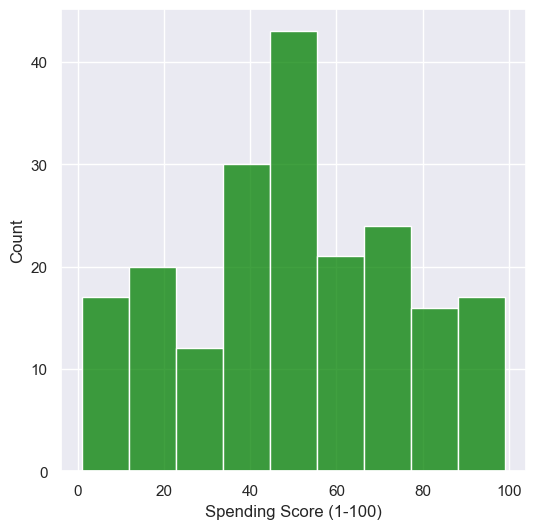

In [29]:
plt.figure(figsize=(6,6))
sns.histplot(data['Spending Score (1-100)'],color="green")
plt.show()

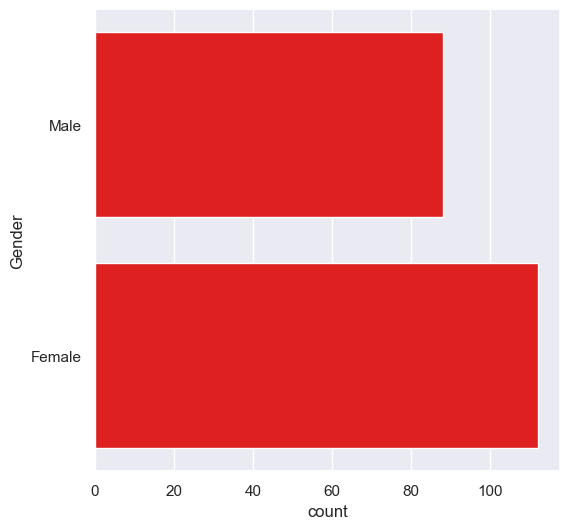

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(data['Gender'],color="red")
plt.show()

In [31]:
x=data.iloc[:,[3,4]].values
x[0]


array([15, 39], dtype=int64)

In [32]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i,init="k-means++", random_state=42)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

In [33]:
print(wcss)

[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33642.57922077923, 26686.83778518779, 24766.471609793443, 23103.122085983916]


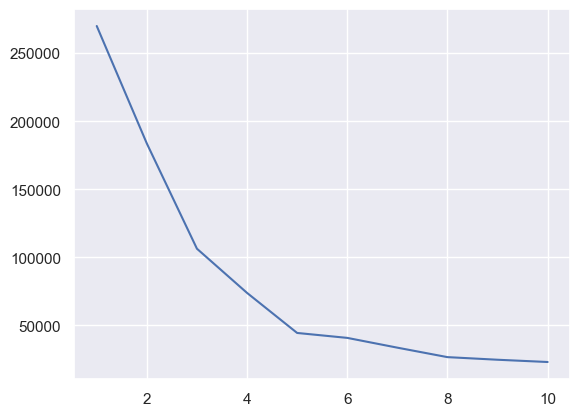

In [34]:
plt.plot(range(1,11),wcss)
plt.show()

In [35]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
y=kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


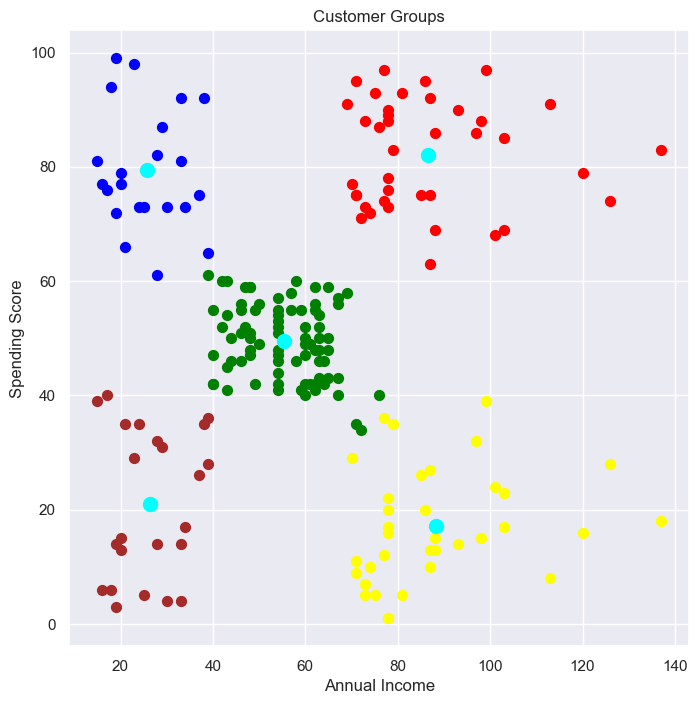

In [36]:
# plotting all cluster and those centroid
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c="green",label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c="red",label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c="yellow",label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c="brown",label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c="blue",label='cluster 5')

# plot centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()